In [213]:
import tensorflow as tf
from tensorflow import keras
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

from PIL import Image
from pylab import *
import cv2
from scipy.ndimage import  filters

In [214]:
train_dir = '/Users/nick/Downloads/chess_data/train'
val_dir = '/Users/nick/Downloads/chess_data/val'
test_dir = '/Users/nick/Downloads/chess_data/test'
test_image_dir = '/Users/nick/Downloads/chess_data/keys'
#классы
black_pawn = 'black_pawn'
empty = 'empty'
test_images = 'test_images'
img_width, img_height = 720, 720
input_shape = (img_width, img_height, 3)
epochs = 3
batch_size = 25

# test_data_portion = 0.15
# val_data_portion = 0.15
# nb_images = 60

nb_train_samples = 137
nb_validation_samples = 19
nb_test_samples = 31

sigma = 0.45

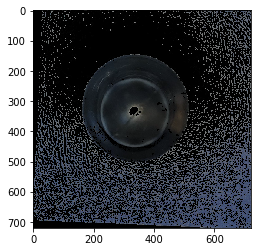

In [216]:
im_test = cv2.imread("/Users/nick/Downloads/chess_data/keys/test_image.jpg")

im_test = cv2.resize(im_test, (720, 720))
hsv = cv2.cvtColor(im_test, cv2.COLOR_BGR2HSV)

lower_black = np.array([0,0,0])
upper_black = np.array([128,128,128])

mask = cv2.inRange(hsv, lower_black, upper_black)
im_test = cv2.bitwise_and(im_test,im_test, mask= mask)
plt.imshow(im_test, cmap = plt.cm.binary)
plt.show()

cv2.imwrite("/Users/nick/Downloads/chess_data/keys/test_image.jpg", im_test)

im_test.shape
im_test = np.expand_dims(im_test, axis = 0)

In [217]:
# test_image = cv2.imread('/Users/nick/Downloads/chess_data/current_test/test_image.jpg', 3)
# cv2.resize(test_image, (720, 720))

In [218]:
# black_pawns = 'black_pawns'
# empty = 'empty'
# start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
# start_test_data_idx = int(nb_images * (1 - test_data_portion))
# print(start_test_data_idx, start_val_data_idx)# def copy_images(start_index, end_index, source_dir, dest_dir, chess_class):
#     i = 0
#     for fn in os.listdir(source_dir):
#         if fn == '.DS_Store':
#             continue
#         if i < start_index:
#             continue
#         if i >= end_index:
#             break
#         shutil.copy2(source_dir, os.path.join(dest_dir, chess_class))
#         i += 1
# copy_images(0, start_val_data_idx, data_dir, val_data, black_pawns)

In [219]:
def process_images(folder_name, class_name):
    for fn in os.listdir(folder_name + '/' + class_name):
        if fn == '.DS_Store':
            continue
        #im = np.array(Image.open(os.path.join(folder_name + '/' + class_name + '/' + fn)).convert('L'))
        im = cv2.imread(os.path.join(folder_name + '/' + class_name + '/' + fn))
        im = cv2.resize(im, (720, 720))
#         imx = np.zeros(im.shape)
#         filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

#         imy = np.zeros(im.shape)
#         filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy)

#         magn = np.sqrt(imx**2 + imy**2)
#         magn = np.uint8(magn)

        
        hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

        lower_black = np.array([0,0,0])
        upper_black = np.array([128,128,128])

        mask = cv2.inRange(hsv, lower_black, upper_black)
        res = cv2.bitwise_and(im,im, mask= mask)
        plt.imshow(mask, cmap = plt.cm.binary)
        plt.show()

        cv2.imwrite(os.path.join(os.path.join(folder_name + '/' + class_name + '/' + fn)), res)

#         plt.figure(figsize=(10,10))
#         plt.xticks([])
#         plt.yticks([])
#         plt.imshow(magn, cmap=plt.cm.binary)
#         plt.show()

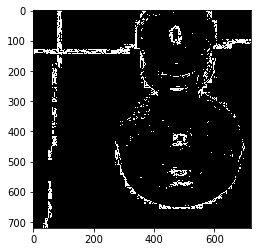

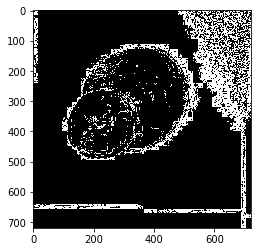

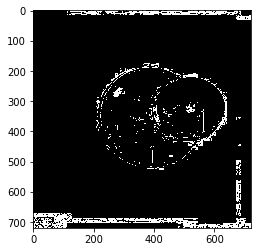

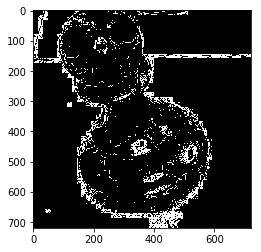

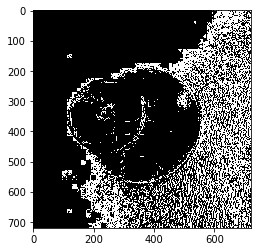

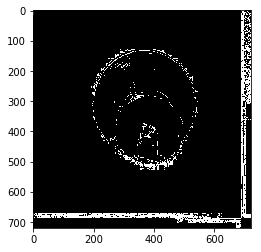

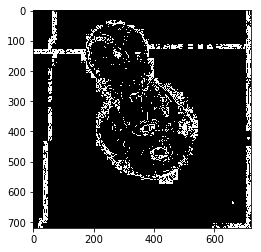

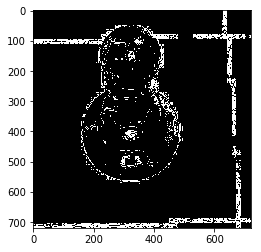

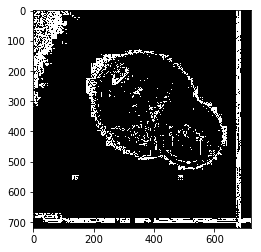

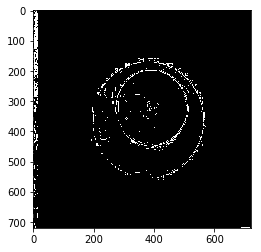

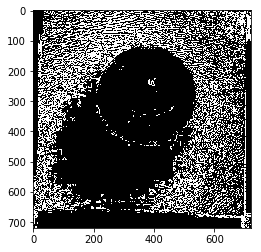

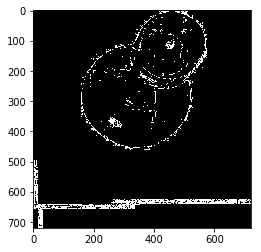

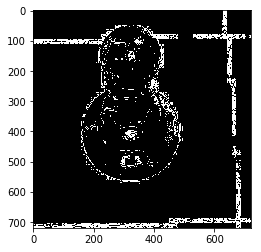

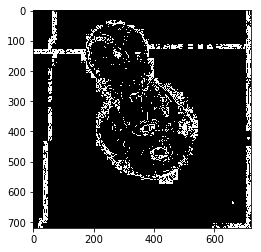

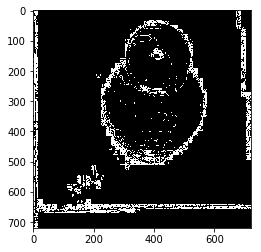

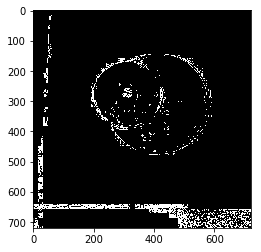

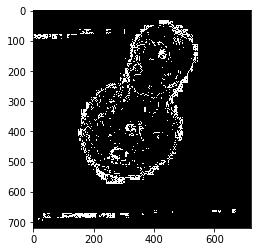

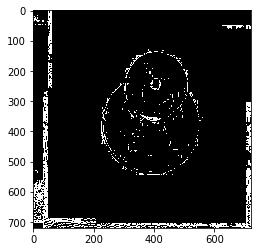

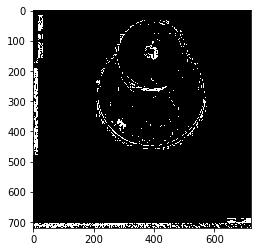

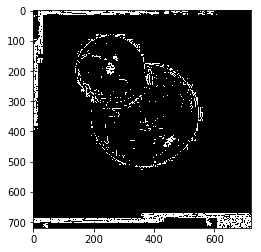

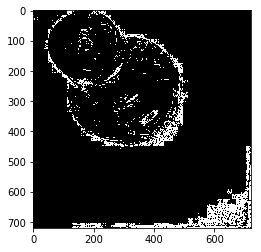

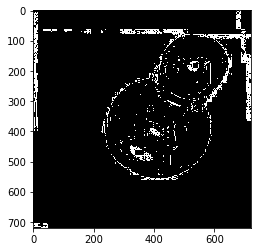

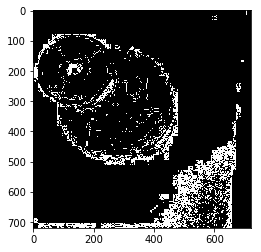

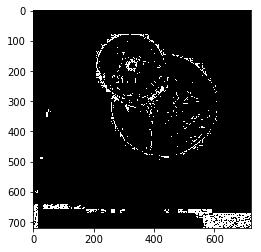

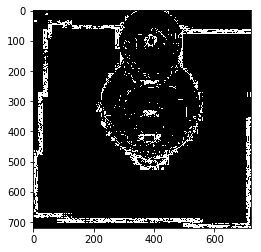

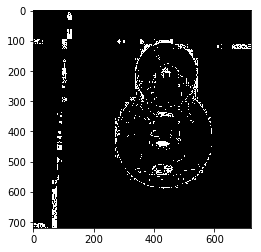

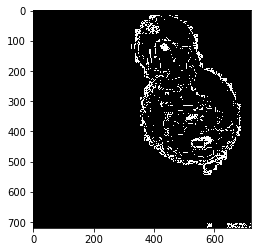

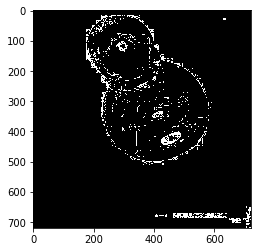

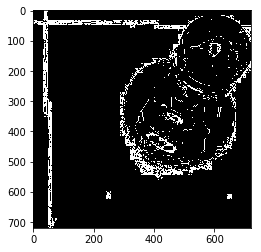

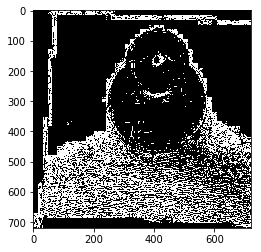

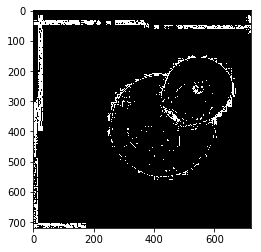

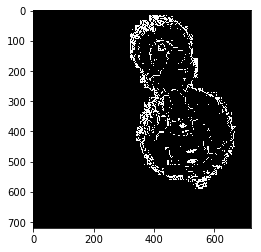

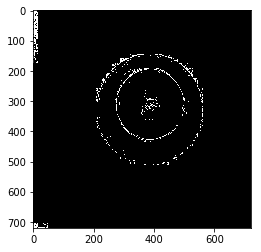

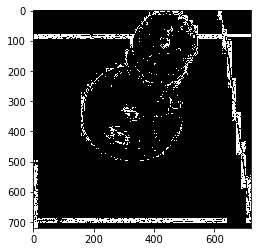

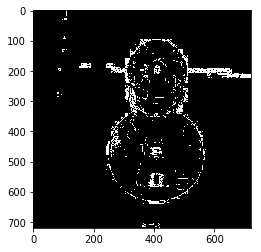

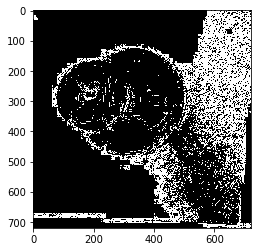

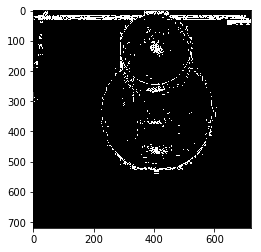

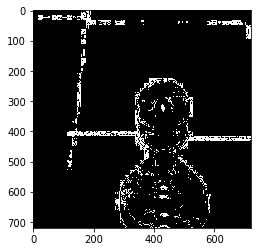

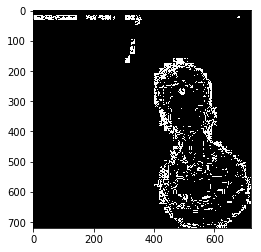

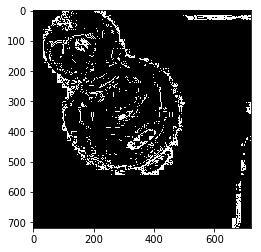

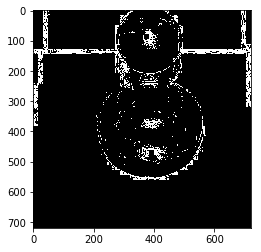

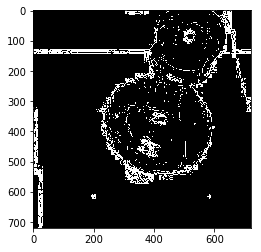

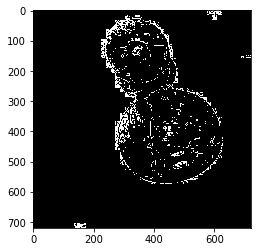

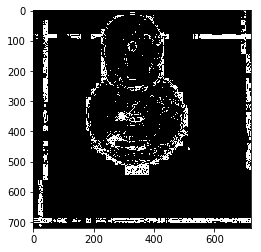

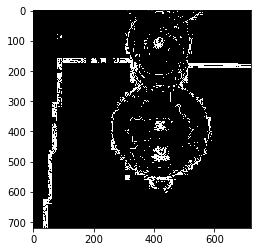

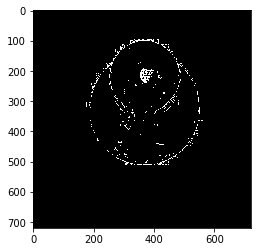

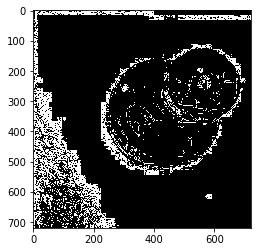

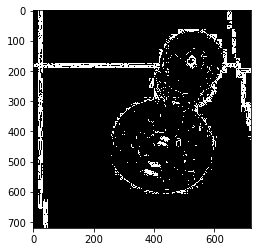

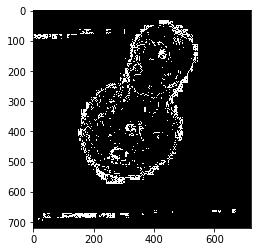

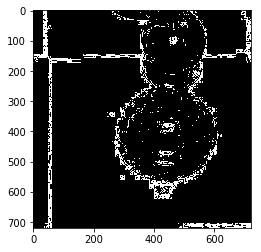

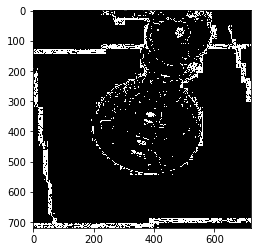

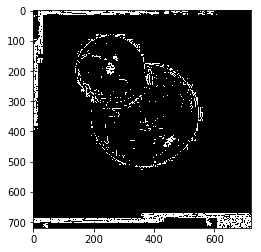

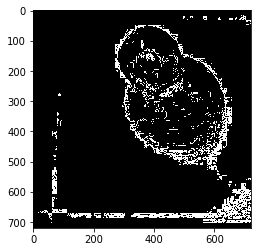

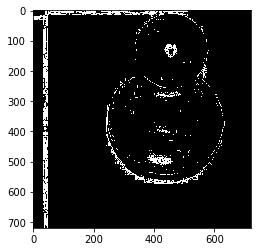

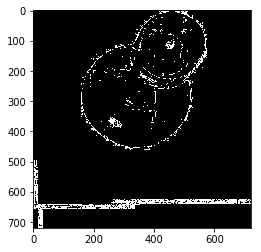

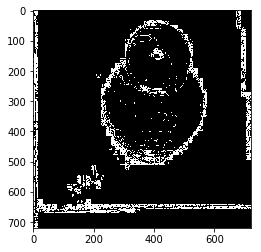

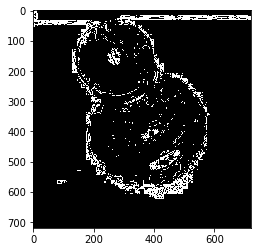

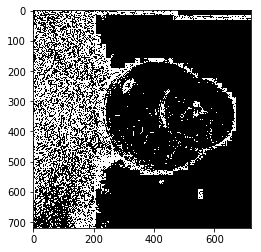

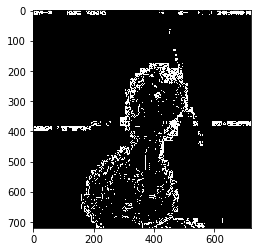

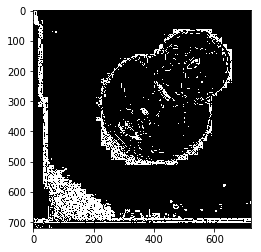

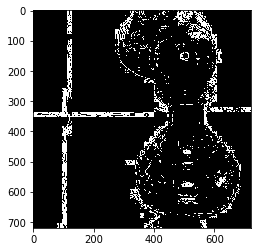

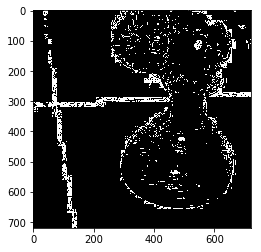

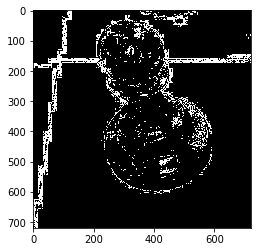

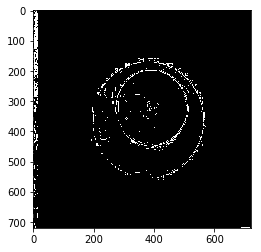

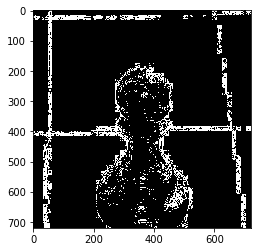

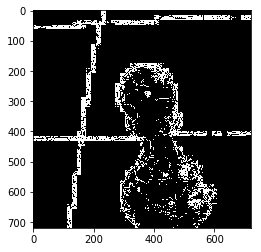

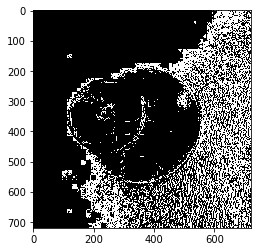

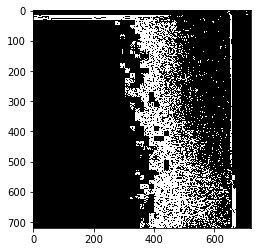

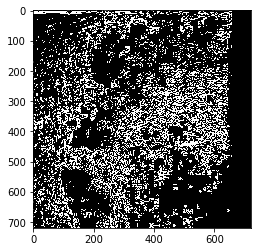

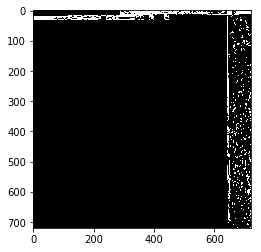

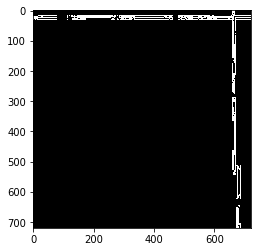

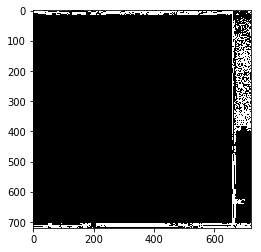

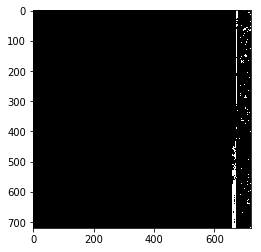

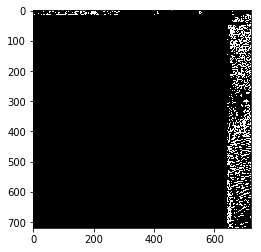

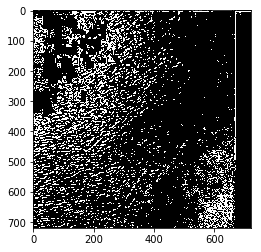

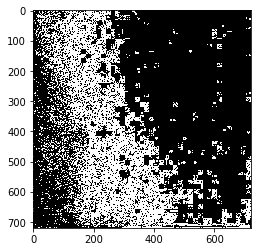

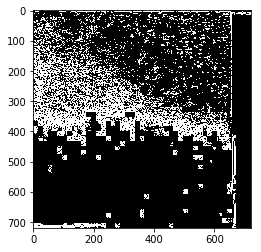

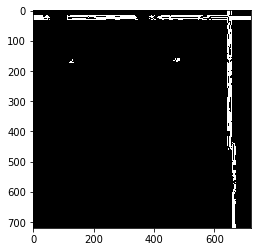

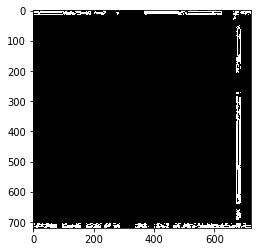

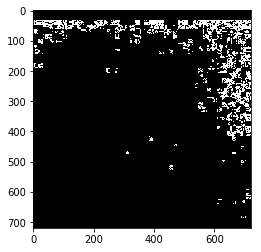

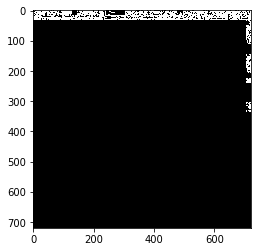

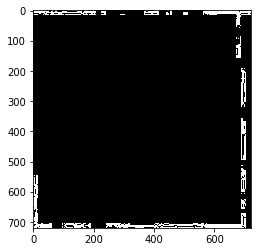

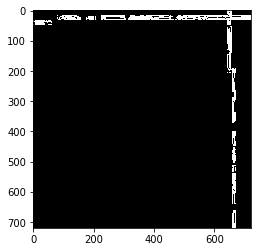

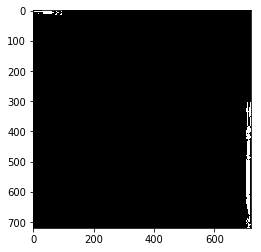

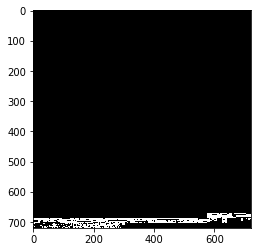

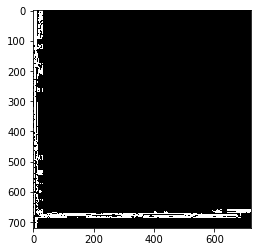

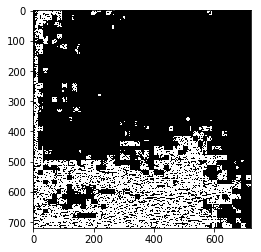

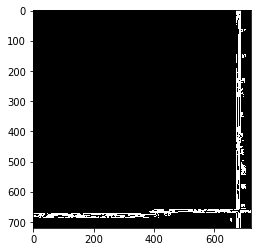

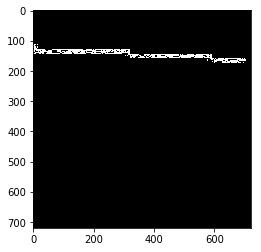

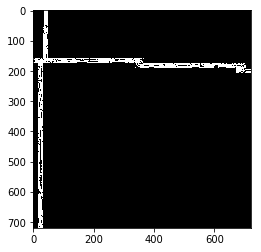

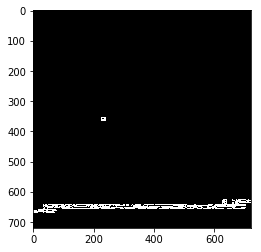

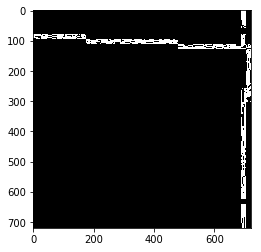

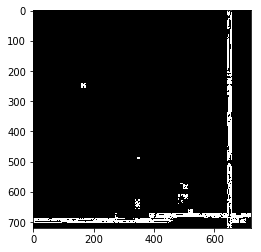

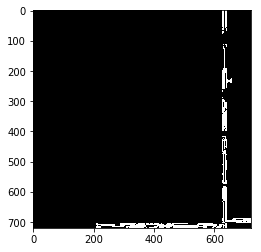

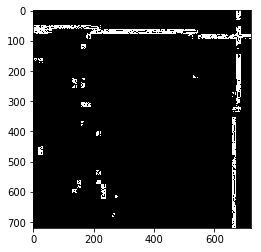

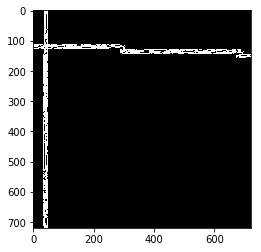

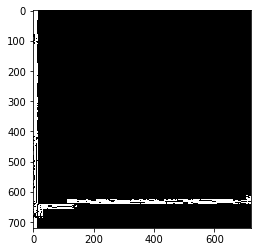

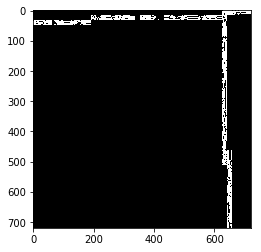

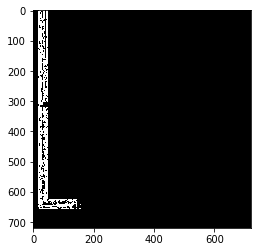

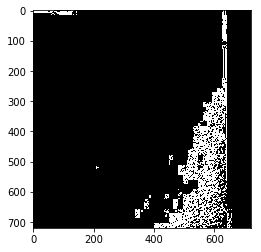

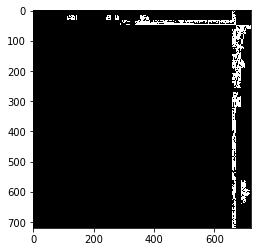

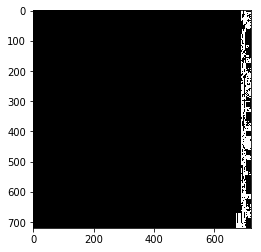

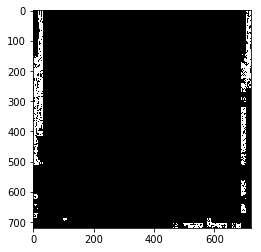

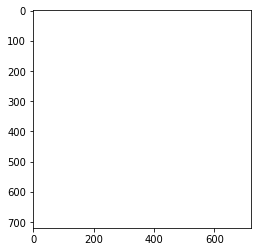

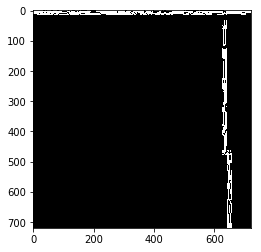

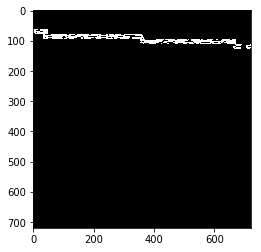

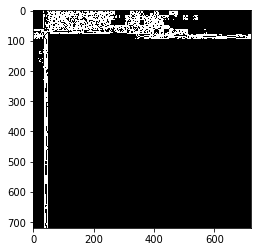

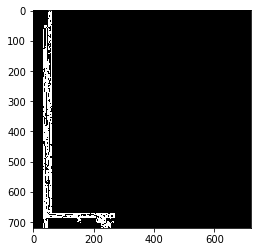

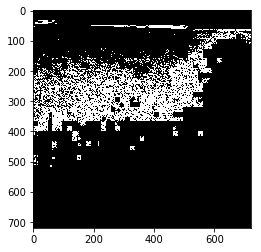

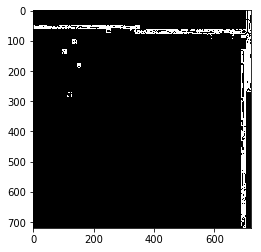

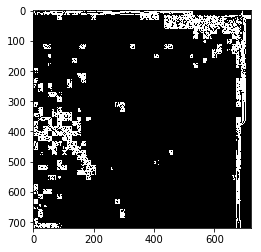

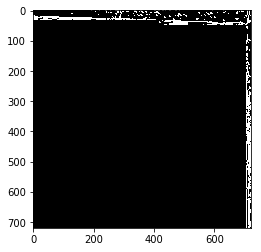

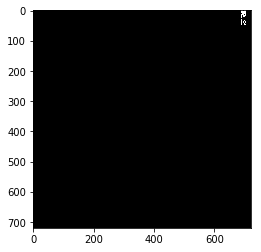

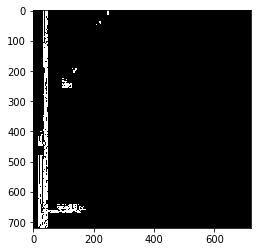

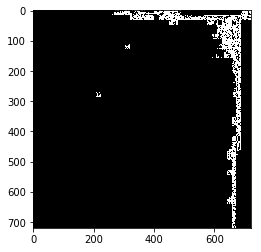

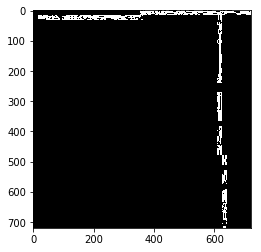

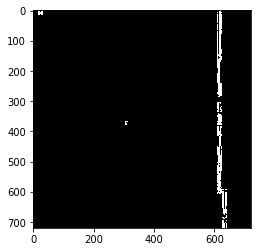

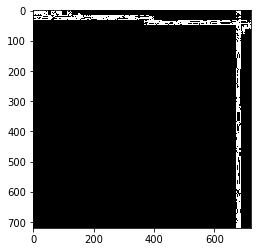

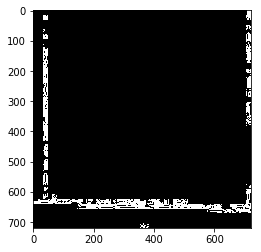

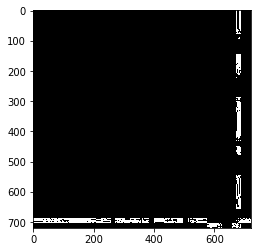

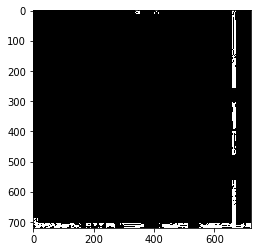

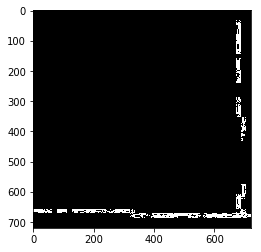

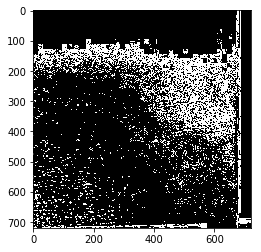

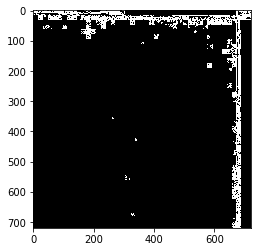

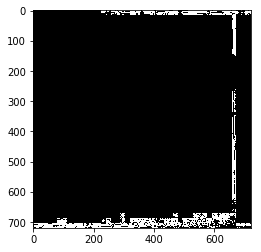

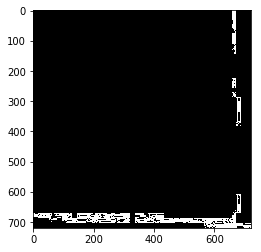

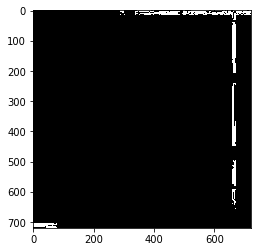

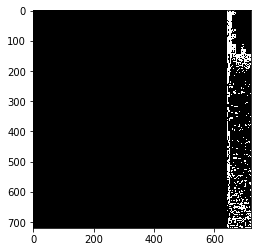

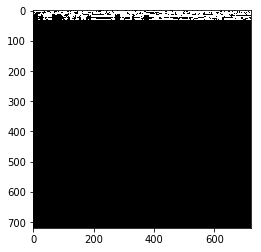

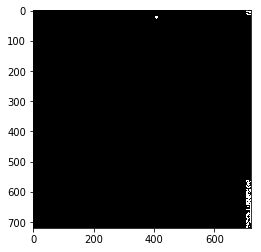

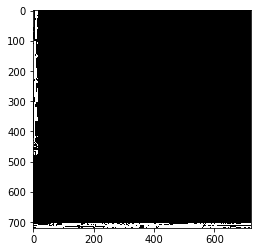

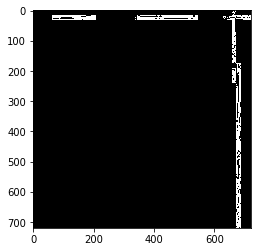

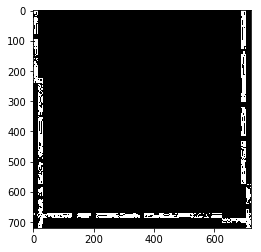

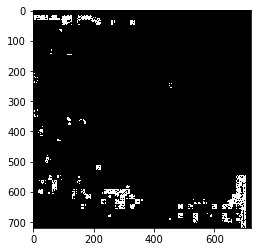

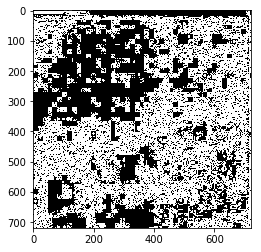

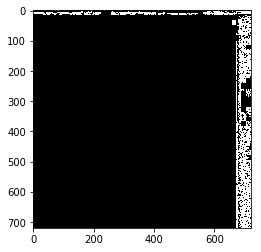

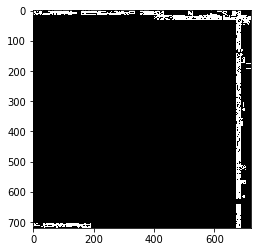

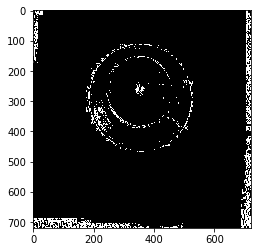

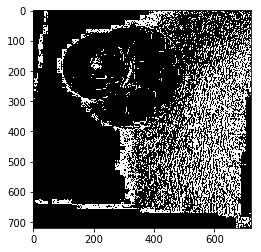

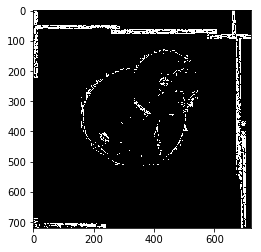

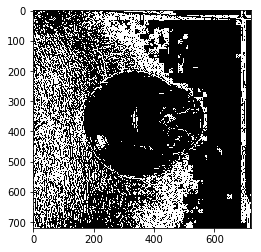

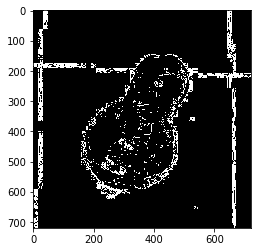

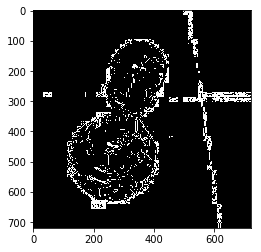

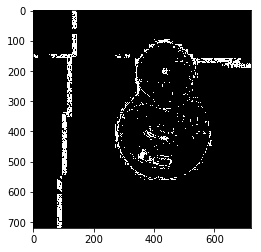

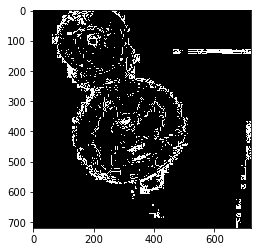

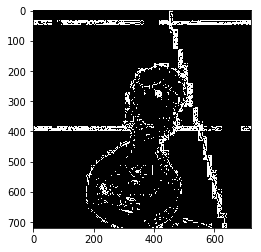

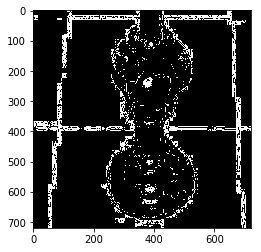

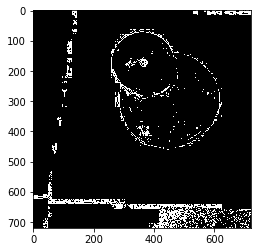

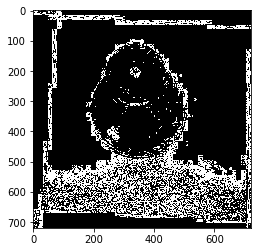

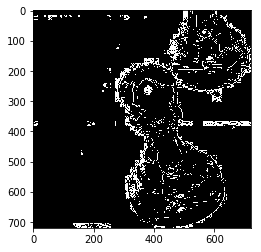

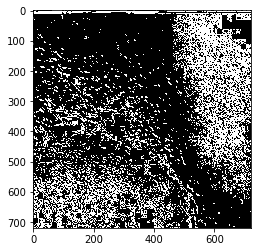

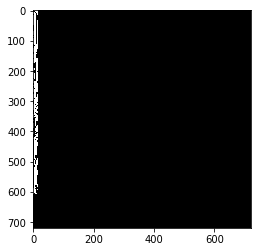

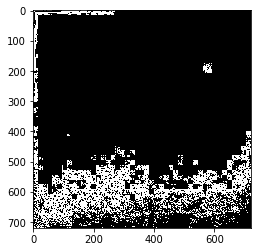

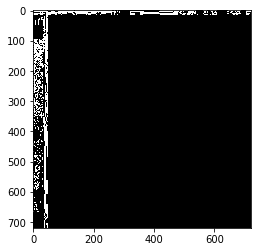

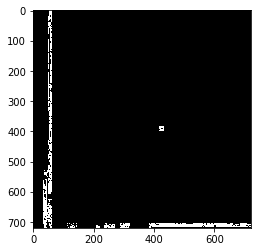

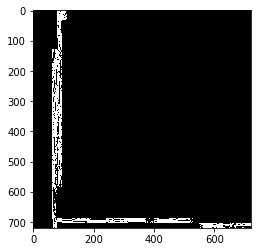

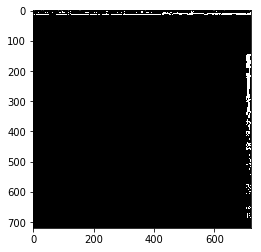

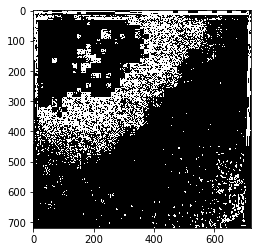

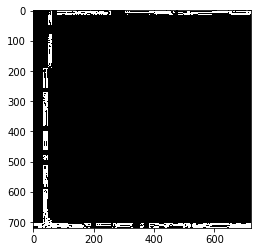

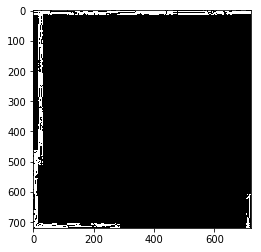

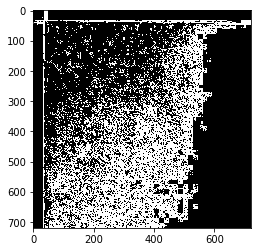

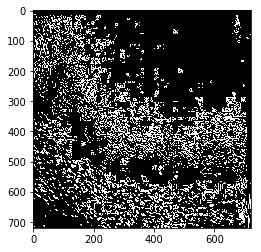

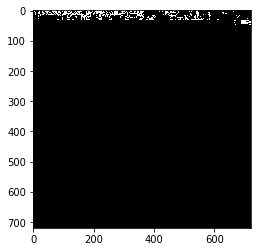

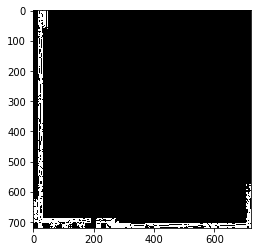

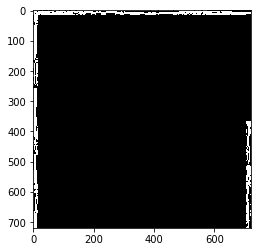

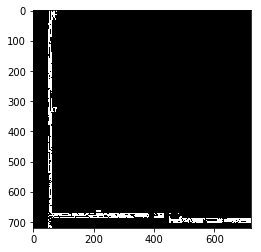

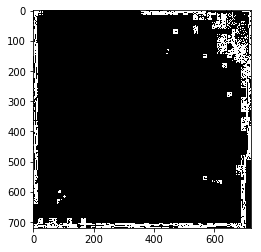

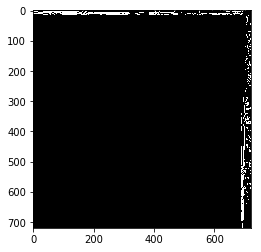

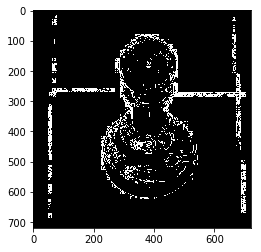

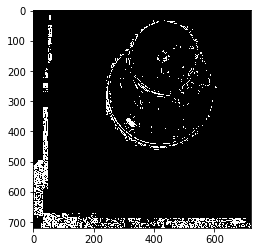

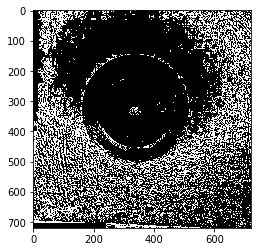

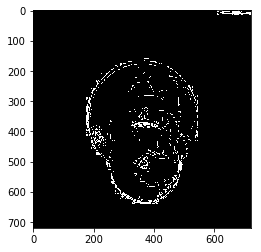

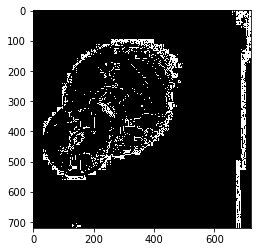

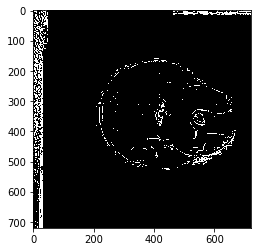

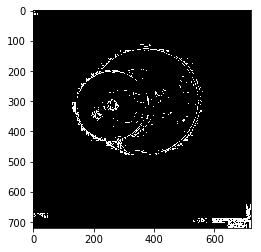

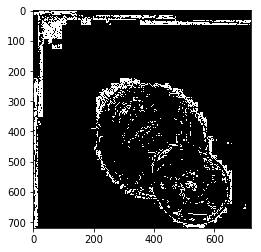

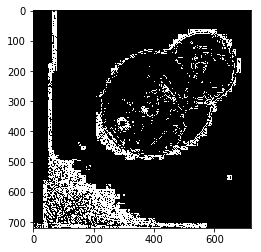

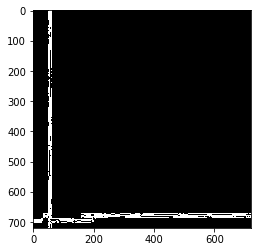

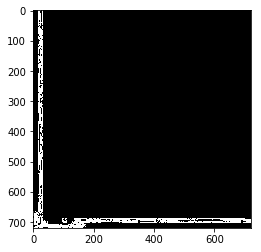

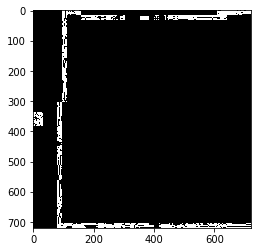

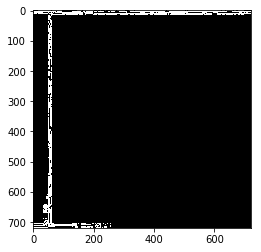

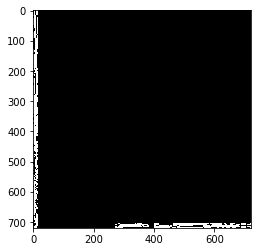

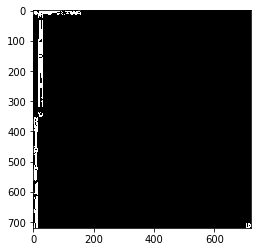

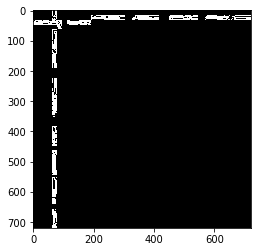

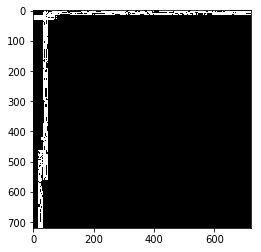

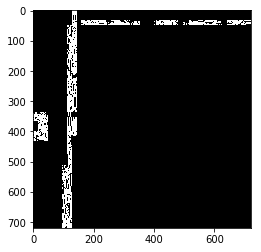

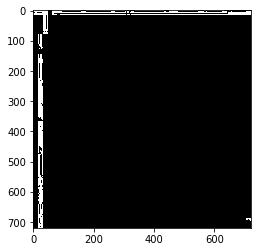

In [220]:
process_images(train_dir, black_pawn)
process_images(train_dir, empty)

process_images(test_dir, black_pawn)
process_images(test_dir, empty)

process_images(val_dir, black_pawn)
process_images(val_dir, empty)

In [221]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [222]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [223]:
datagen = ImageDataGenerator(rescale=1./255)

In [224]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
# current_test =. datagen.flow_from_directory(
#     current_test_dir,
#     target_size)

Found 137 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [225]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/3
6/6 [==============================] - 97s 16s/step - loss: 0.8969 - acc: 0.7445 - val_loss: 0.4298 - val_acc: 0.9474
Epoch 2/3
6/6 [==============================] - 83s 14s/step - loss: 0.3650 - acc: 0.9343 - val_loss: 0.0672 - val_acc: 1.0000
Epoch 3/3
6/6 [==============================] - 84s 14s/step - loss: 0.2275 - acc: 0.9489 - val_loss: 0.1299 - val_acc: 0.9474


In [226]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Вероятность распознавания на тестовых данных: %.2f%%" % (scores[1]*100))

Вероятность распознавания на тестовых данных: 96.77%


In [227]:
#omg

In [228]:
test_image = datagen.flow_from_directory(
    test_image_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
# pred = model.predict(final_image)
# pred_class = model.predict_classes(final_image)

Found 0 images belonging to 0 classes.


In [229]:
model.predict(test_generator, verbose=1)

2/2 [==============================] - 4s 2s/step


array([[0.94251513],
       [0.03413373],
       [0.85813296],
       [0.05600357],
       [0.91669416],
       [0.01222074],
       [0.03570428],
       [0.03417224],
       [0.07017359],
       [0.23598048],
       [0.05547619],
       [0.06531376],
       [0.00788406],
       [0.9582349 ],
       [0.3427308 ],
       [0.9128527 ],
       [0.00887999],
       [0.1164344 ],
       [0.96161646],
       [0.06448388],
       [0.9961107 ],
       [0.95850044],
       [0.33416316],
       [0.9691131 ],
       [0.01317136],
       [0.03740522],
       [0.07606843],
       [0.0145542 ],
       [0.9968072 ],
       [0.9992519 ],
       [0.9976859 ]], dtype=float32)